Mounted at /content/drive
Found 3026 images belonging to 6 classes.
Found 753 images belonging to 6 classes.


/tmp/ipython-input-1-3299709485.py:40: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244, 244, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.4284 - loss: 1.4723

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 995s 10s/step - accuracy: 0.4296 - loss: 1.4700 - val_accuracy: 0.6361 - val_loss: 1.0241
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6713 - loss: 0.9093 - val_accuracy: 0.7278 - val_loss: 0.8119
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.7772 - loss: 0.6791 - val_accuracy: 0.7517 - val_loss: 0.7364
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.8238 - loss: 0.5433 - val_accuracy: 0.7463 - val_loss: 0.7169
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.8520 - loss: 0.4806 - val_accuracy: 0.7636 - val_loss: 0.6543
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8534 - loss: 0.4506 - val_accuracy: 0.7649 - val_loss: 0.6000
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8758 - loss: 0.3999 - val_accuracy: 0.7769 - val_loss: 0.5974
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8769 - loss: 0.3759 - val_accuracy: 0.7835 - val_loss: 0

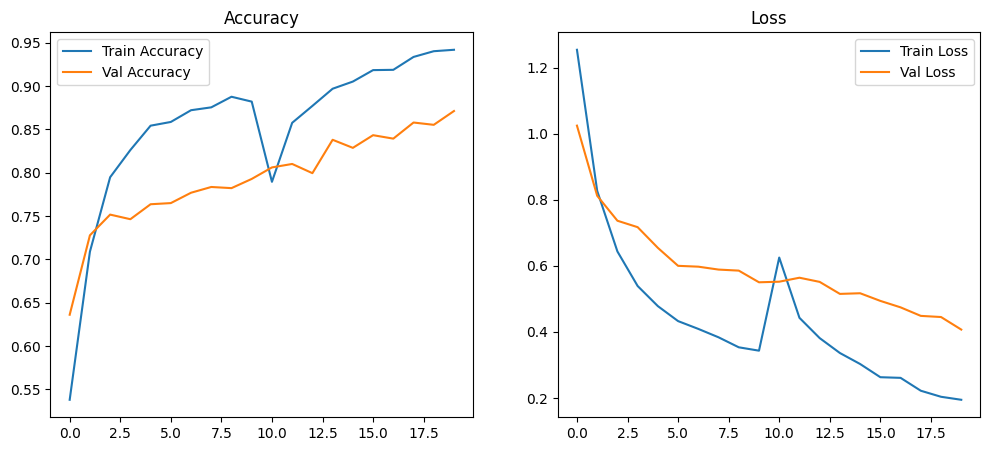

In [ ]:
#Raghad-------------------------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/drive/MyDrive/Graduation project/dataset proj2/new dataset/Faulty_solar_panel'
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=10
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

#Dareen-------------------------------------------------------------------------
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244, 244, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history_initial = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop]
)


base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop]
)

#Fatima-------------------------------------------------------------------------
import matplotlib.pyplot as plt

def plot_training(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_training(history_initial, history_finetune)

In [ ]:
print(len(base_model.layers))  # عدد الطبقات
for i, layer in enumerate(base_model.layers):
    print(f"{i}: {layer.name} — Trainable: {layer.trainable}")

154
0: input_layer — Trainable: False
1: Conv1 — Trainable: False
2: bn_Conv1 — Trainable: False
3: Conv1_relu — Trainable: False
4: expanded_conv_depthwise — Trainable: False
5: expanded_conv_depthwise_BN — Trainable: False
6: expanded_conv_depthwise_relu — Trainable: False
7: expanded_conv_project — Trainable: False
8: expanded_conv_project_BN — Trainable: False
9: block_1_expand — Trainable: False
10: block_1_expand_BN — Trainable: False
11: block_1_expand_relu — Trainable: False
12: block_1_pad — Trainable: False
13: block_1_depthwise — Trainable: False
14: block_1_depthwise_BN — Trainable: False
15: block_1_depthwise_relu — Trainable: False
16: block_1_project — Trainable: False
17: block_1_project_BN — Trainable: False
18: block_2_expand — Trainable: False
19: block_2_expand_BN — Trainable: False
20: block_2_expand_relu — Trainable: False
21: block_2_depthwise — Trainable: False
22: block_2_depthwise_BN — Trainable: False
23: block_2_depthwise_relu — Trainable: False
24: block_2_

In [ ]:
model.save('/content/drive/MyDrive/Graduation project/saved_mobilenet2_model.keras')
